In [1]:
import igraph
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import networkx as nx

In [2]:
graph_data = pd.read_csv("manufacturing_emails_temporal_network.csv", sep = ";")

In [3]:
graph_data.head(5)

,node1,node2,timestamp
0,1,2,1
1,1,3,1
2,1,4,1
3,1,5,1
4,1,6,1


In [4]:
graph_data_nodes = graph_data.drop(["timestamp"], axis=1)

In [11]:
graph_data_nodes.head()

,node1,node2
0,1,2
1,1,3
2,1,4
3,1,5
4,1,6


In [6]:
tuples = [tuple(x) for x in graph_data_nodes.values]

In [7]:
uniqueTup = list(set(tuples))

In [8]:
Gm = igraph.Graph.TupleList(uniqueTup, directed = False)

In [14]:
uniqueTup[:10]

[(50, 96),
 (32, 54),
 (14, 74),
 (74, 106),
 (38, 124),
 (48, 86),
 (104, 115),
 (16, 47),
 (72, 92),
 (1, 64)]

## Question A

### a)

In [12]:
# number of links and nodes in the network
igraph.summary(Gm, verbosity=0)

IGRAPH UN-- 167 3250 -- 
+ attr: name (v)


In [14]:
# graph density 
Gm.density(loops = False)

0.23447081740134187

In [15]:
# average degree of the network
average_degree = (2 * 3250)/167
average_degree

38.92215568862275

In [33]:
# degree variance
variance_degree = ((2*3250)*(pow(167,2) - 167 - (2*3250)))/(pow(167,3) + pow(167,2))
variance_degree

29.441331195607074

### b)

In [16]:
graphNx = nx.Graph(uniqueTup)

In [147]:
def plot_degree_dist(G):
    degrees = [G.degree(n) for n in G.nodes()]
    fraction = [(degrees.count(i)/nx.number_of_nodes(graphNx)) for i in degrees]
    plt.bar(degrees,fraction)
    plt.show()

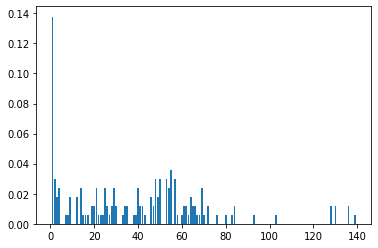

In [148]:
plot_degree_dist(graphNx)

### c)

In [79]:
#degree assotivity
Gm.assortativity_degree(directed=False)

-0.2951772978930204

In [ ]:
# the degree of the nodes are relatively disassortative

### d)

In [80]:
# clustering coefficient
Gm.transitivity_undirected(mode="nan")

0.5412664316573972

### e)

In [82]:
# average hop count/ average path length
Gm.average_path_length(directed=True)

1.9673905201644903

In [83]:
# diameter
Gm.diameter(directed=True)

5

### f)

In [ ]:
# A small world network is characterized by a small average shortest path length, and a large clustering coefficient.

    sigma = 

    C = nx.transitivity(G)
    L = nx.average_shortest_path_length(G)
    Cr = np.mean(randMetrics["C"])
    Lr = np.mean(randMetrics["L"])

    sigma = (C / Cr) / (L / Lr)


In [165]:
C = Gm.transitivity_undirected(mode="nan")

In [166]:
L = Gm.average_path_length(directed=True)

In [167]:
ranGraph = Gm.Erdos_Renyi(167, m=3250, directed=False, loops=False)

In [168]:
Cr = ranGraph.transitivity_undirected(mode="nan")

In [169]:
Lr = ranGraph.average_path_length(directed=True)

In [170]:
sigma = (C / Cr) / (L / Lr)

In [171]:
# if sigma >1, ( C >> Cr and L ~ Lr), network is small-world
sigma

2.0713513666324985